# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
print('Modules are imported.')

Modules are imported.


In [5]:
warnings.filterwarnings('ignore')

In [7]:
corona_dataset_csv = pd.read_csv("covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### checking the shape of the dataframe

In [9]:
corona_dataset_csv.shape

(266, 104)

### deleting columns not relevant to our analysis

In [11]:
corona_dataset_csv.drop(["Lat", "Long"], axis = 1, inplace = True)

In [13]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregating the rows by the country

In [15]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum(numeric_only = True)

In [17]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [19]:
corona_dataset_aggregated.shape

(187, 100)

### Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

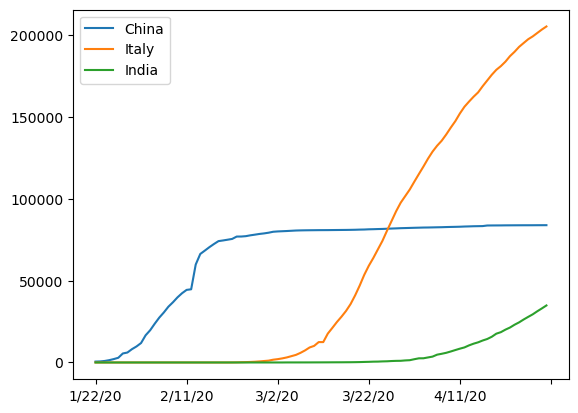

In [21]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["India"].plot()
plt.legend()
plt.show()

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

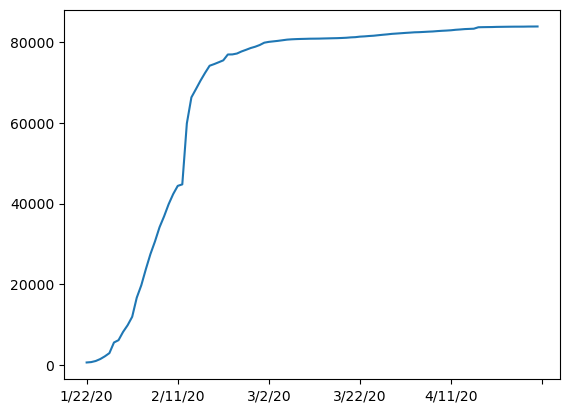

In [26]:
corona_dataset_aggregated.loc["China"].plot()
plt.show()

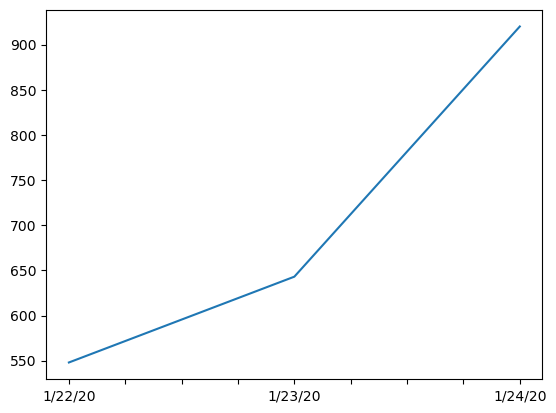

In [28]:
corona_dataset_aggregated.loc["China"][:3].plot()
plt.show()

### caculating the first derivative of the curve

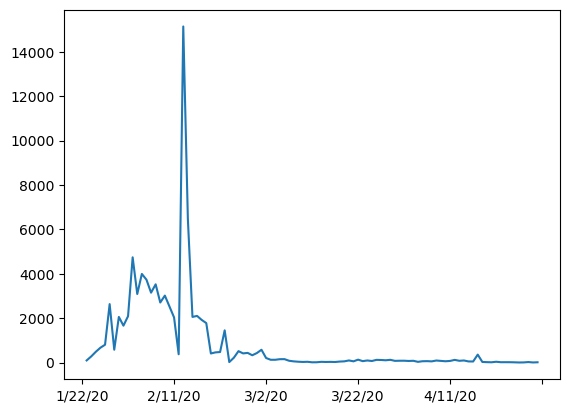

In [30]:
corona_dataset_aggregated.loc["China"].diff().plot()
plt.show()

### finding maxmimum infection rate for China

In [32]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

### finding maximum infection rate for all of the countries. 

In [34]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [36]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### creatint a new dataframe with only needed column, i.e, the maximum infection rate

In [38]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [40]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### importing the dataset

In [42]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [44]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### dropping columns not relevant to our analysis 

In [46]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [48]:
happiness_report_csv.drop(useless_cols, axis = 1, inplace = True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### changing the indices of the dataframe

In [50]:
happiness_report_csv.set_index("Country or region", inplace = True)

In [52]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### now we'll join two datasets we have prepared  

#### Corona Dataset :

In [54]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [56]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [58]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [60]:
happiness_report_csv.shape

(156, 4)

In [62]:
data = corona_data.join(happiness_report_csv, how = "inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### correlation matrix and visualization

In [64]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


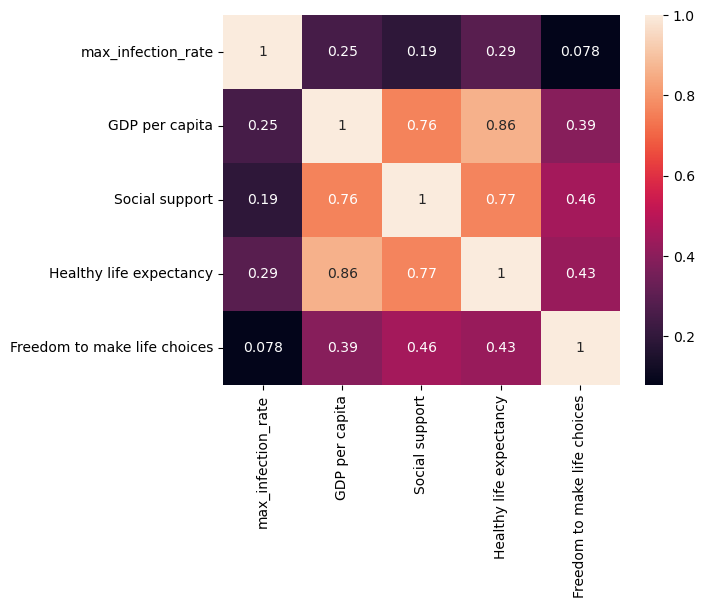

In [66]:
sns.heatmap(data.corr(), annot = True)
plt.show()

### Visualization of the results


In [68]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

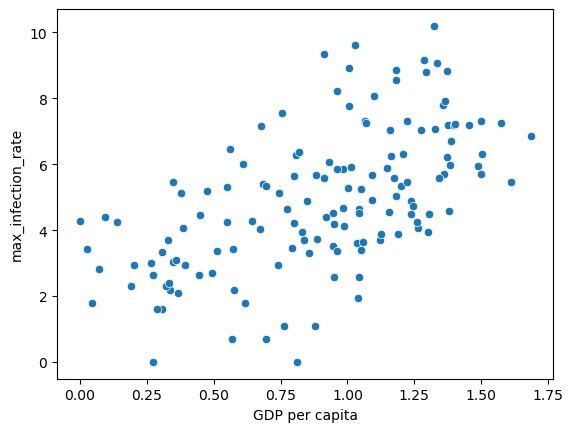

In [70]:
x = data["GDP per capita"]
y = data["max_infection_rate"]

sns.scatterplot(x = x, y = np.log(y))
plt.show()

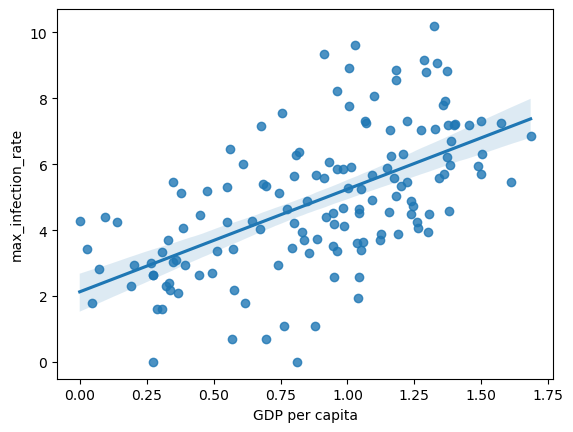

In [72]:
sns.regplot(x = x, y = np.log(y))
plt.show()

### Plotting Social support vs maximum Infection rate

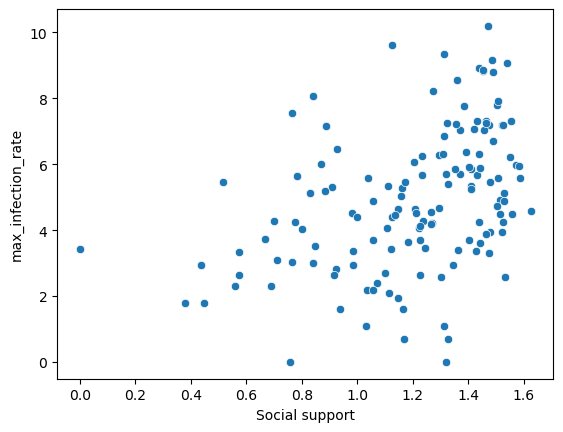

In [74]:
x = data["Social support"]
y = data["max_infection_rate"]

sns.scatterplot(x = x, y = np.log(y))
plt.show()

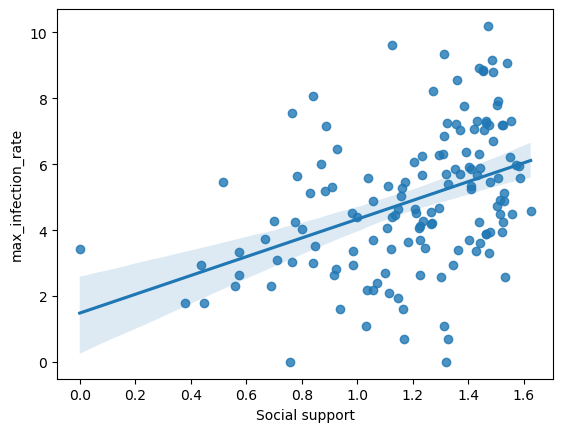

In [76]:
sns.regplot(x = x, y = np.log(y))
plt.show()

### Plotting Healthy life expectancy vs maximum Infection rate

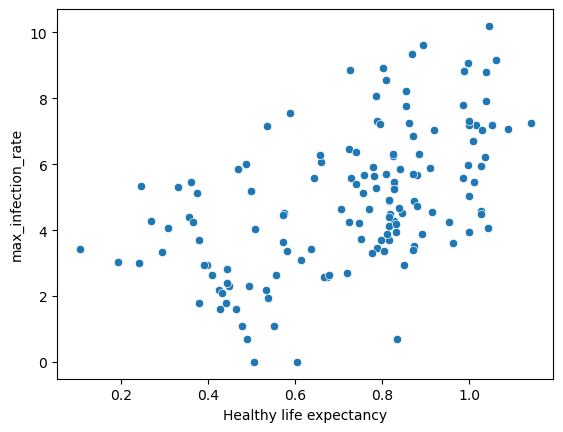

In [78]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]

sns.scatterplot(x = x, y = np.log(y))
plt.show()

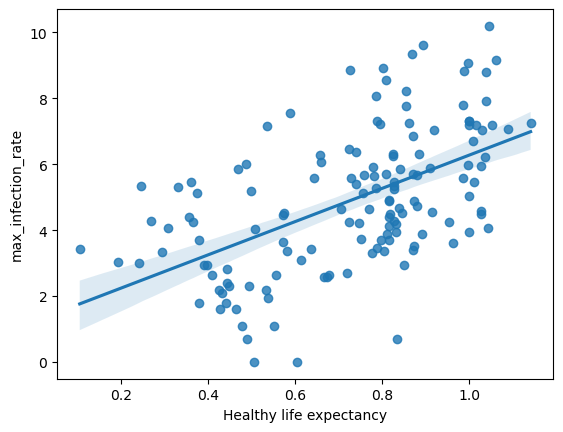

In [80]:
sns.regplot(x = x, y = np.log(y))
plt.show()

### Plotting Freedom to make life choices vs maximum Infection rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

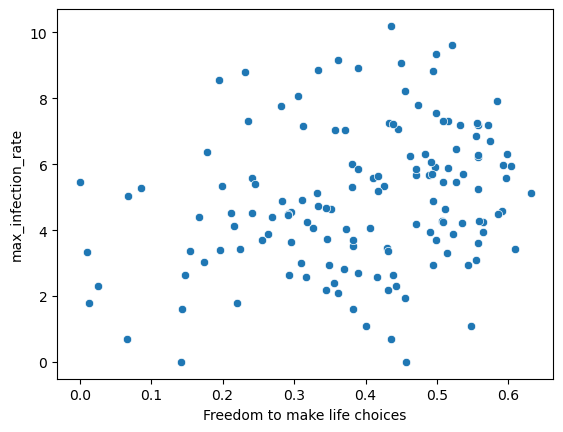

In [82]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]

sns.scatterplot(x = x, y = np.log(y))

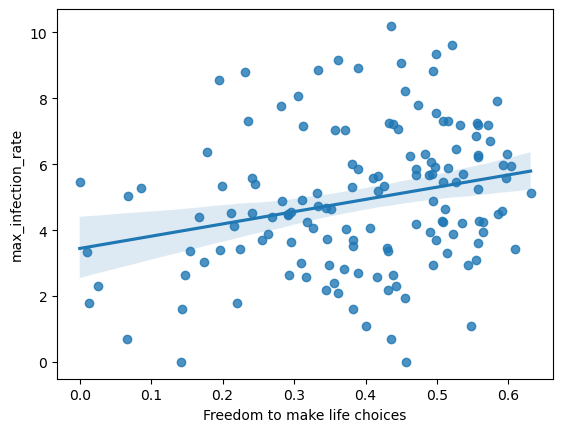

In [86]:
sns.regplot(x = x, y = np.log(y))
plt.show()

## We will analyze covid data with death records

In [88]:
corona_deaths = pd.read_csv("covid19_deaths_dataset.csv")
corona_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [90]:
corona_deaths.drop(["Lat", "Long"], axis = 1, inplace = True)

In [92]:
corona_deaths.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [94]:
corona_deaths_aggregated = corona_deaths.groupby("Country/Region").sum(numeric_only = True)
corona_deaths_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


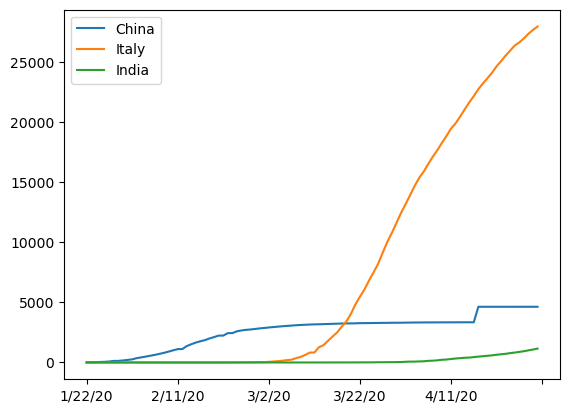

In [96]:
corona_deaths_aggregated.loc["China"].plot()
corona_deaths_aggregated.loc["Italy"].plot()
corona_deaths_aggregated.loc["India"].plot()
plt.legend()
plt.show()

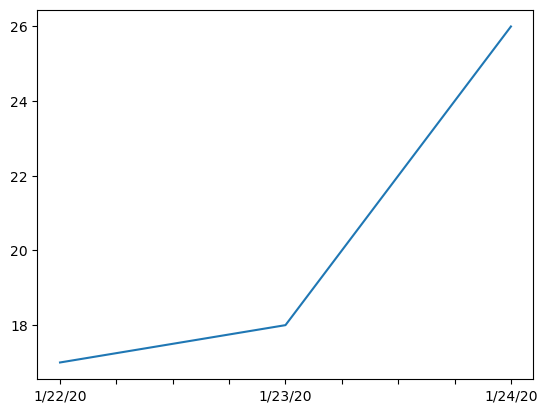

In [98]:
corona_deaths_aggregated.loc["China"][:3].plot()
plt.show()

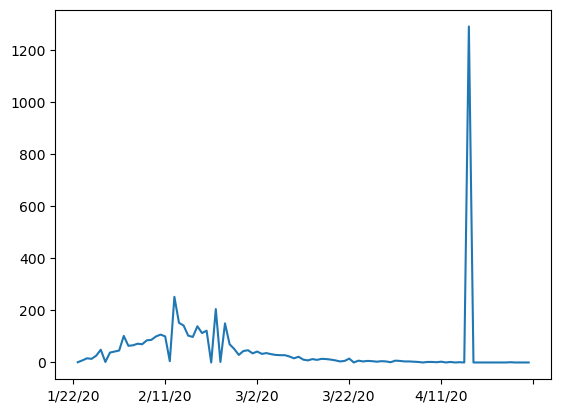

In [100]:
corona_deaths_aggregated.loc["China"].diff().plot()
plt.show()

In [102]:
corona_deaths_aggregated.loc["China"].diff().max()

1290.0

## finding the max death rate for every country

In [106]:
countries2 = list(corona_deaths_aggregated.index)
max_death_rate = []

for c in countries2:
    max_death_rate.append(corona_deaths_aggregated.loc[c].diff().max())

corona_deaths_aggregated["max_death_rate"] = max_death_rate

In [108]:
corona_deaths_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


## creating a new dataframe with only the required column

In [110]:
corona_deaths_data = pd.DataFrame(corona_deaths_aggregated['max_death_rate'])
corona_deaths_data.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [112]:
# we will work with the world happiness report that we have imported earlier

happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [114]:
data_2 = corona_deaths_data.join(happiness_report_csv, how = "inner")
data_2.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


## Checking correlation of our data

In [116]:
data_2.corr()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


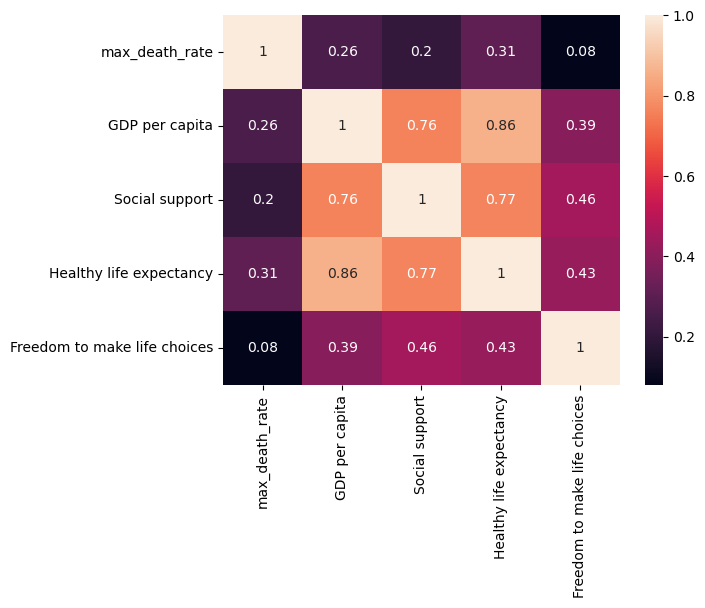

In [118]:
sns.heatmap(data_2.corr(), annot = True)
plt.show()

## Visualization of the results

### Plotting GDP vs maximum death rate

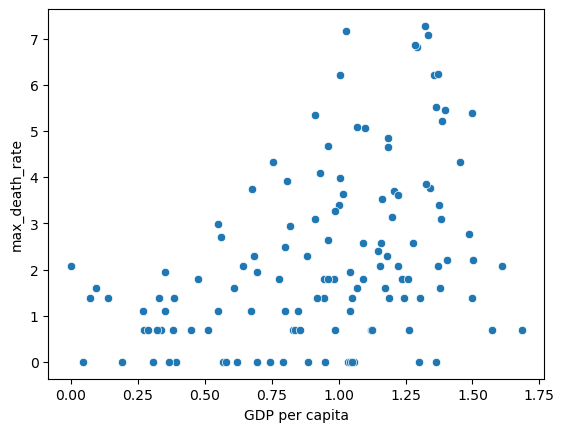

In [120]:
x = data_2["GDP per capita"]
y = data_2["max_death_rate"]

sns.scatterplot(x = x, y = np.log(y))
plt.show()

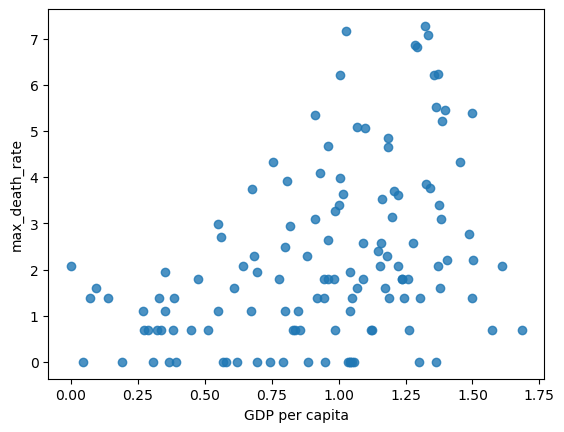

In [122]:
sns.regplot(x = x , y = np.log(y))
plt.show()

### Plotting Social support vs maximum death rate

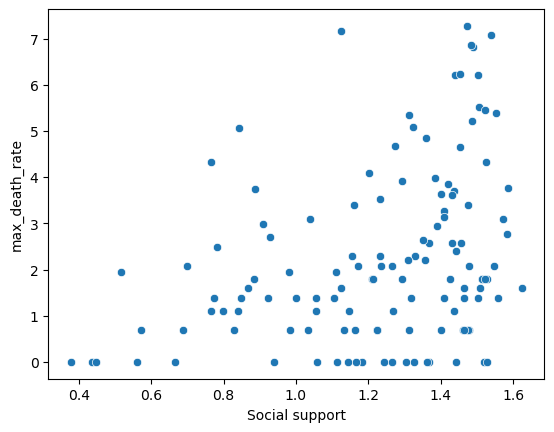

In [124]:
x = data_2["Social support"]
y = data_2["max_death_rate"]

sns.scatterplot(x = x, y = np.log(y))
plt.show()

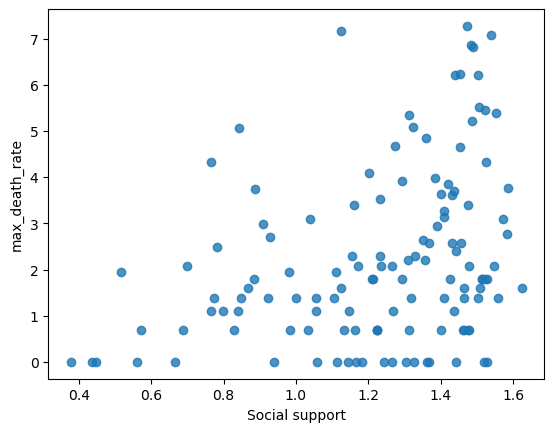

In [126]:
sns.regplot(x = x , y = np.log(y), fit_reg=True)
plt.show()

### Plotting Healthy life expentency vs maximum death rate

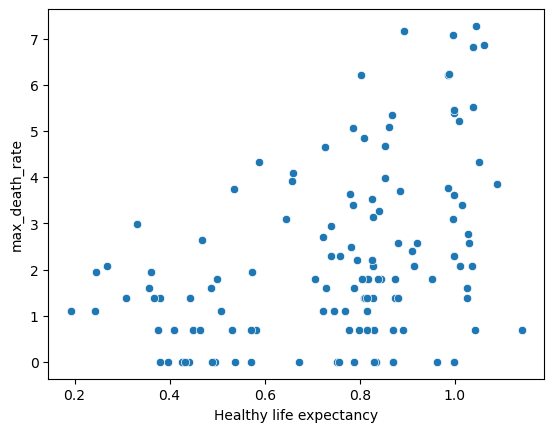

In [128]:
x = data_2["Healthy life expectancy"]
y = data_2["max_death_rate"]

sns.scatterplot(x = x, y = np.log(y))
plt.show()

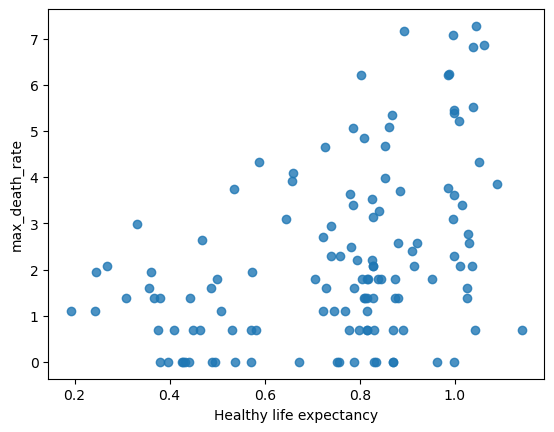

In [130]:
sns.regplot(x = x , y = np.log(y))
plt.show()

### Plotting Freedom to make life choices vs maximum death rate

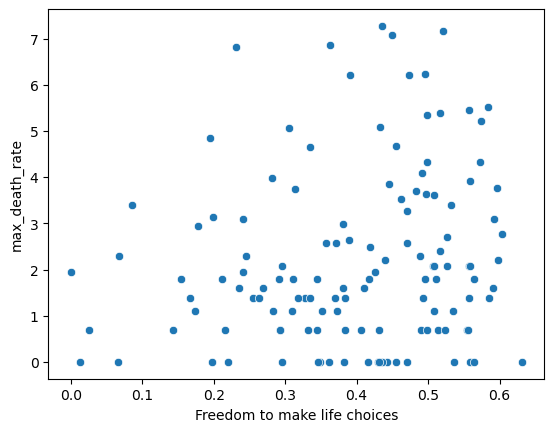

In [132]:
x = data_2["Freedom to make life choices"]
y = data_2["max_death_rate"]

sns.scatterplot(x = x, y = np.log(y))
plt.show()

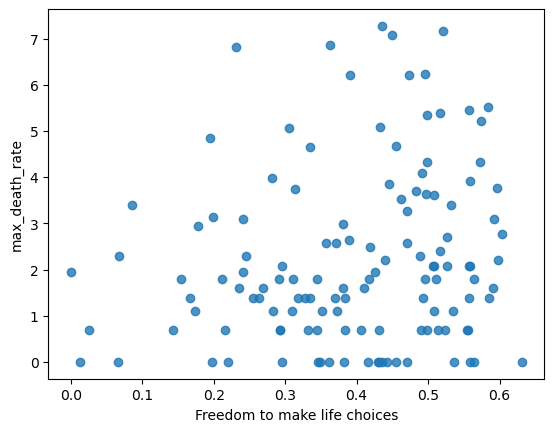

In [134]:
sns.regplot(x = x , y = np.log(y))
plt.show()